In [1]:
# Let's import our imports ;)
from telco_setup import telco_imports
telco_imports()


import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from modeling import confusion, random_forest_models
    


In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, \
precision_score, recall_score, classification_report
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = acquire.get_telco_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   internet_service_type  7043 non-null   object 
 9   online_security        7043 non-null   object 
 10  online_backup          7043 non-null   object 
 11  device_protection      7043 non-null   object 
 12  tech_support           7043 non-null   object 
 13  streaming_tv           7043 non-null   object 
 14  streaming_movies       7043 non-null   object 
 15  cont

In [4]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,No


In [5]:
df.total_charges.value_counts(dropna=False)

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [6]:
# df = prepare.prep_telco()
df = prepare.fix_nulls()

In [7]:
df.total_charges.value_counts(dropna=False)

20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6534, dtype: int64

In [8]:
df.total_charges.isnull().value_counts()

False    7043
Name: total_charges, dtype: int64

In [16]:
# df = prepare.prep_telco(df)

In [9]:
def split_data(df, strat_by, rand_st=123):
    '''
    Takes in: a `pd.DataFrame()`
          and a `column` to stratify by  ;dtype(str)
          and a `random state`           ;if no random state is specifed defaults to [123]
          
      prints the `.shape` of the `DataFrame` taken in and the
      `Train`, `Validate`, and `Test` `DataFrames` returned
      `return: train, validate, test`    ;subset `DataFframes`
    '''
#     train test split giving 20% to the testing data set and stratifying by the Parameter field: strat_by
    train, test = train_test_split(df, test_size=.2, 
                               random_state=rand_st, stratify=df[strat_by])
#     train test split to break out a validation set the same size as the test set
    train, validate = train_test_split(train, test_size=.25, 
                 random_state=rand_st, stratify=train[strat_by])
#     print the name and shape of the resultant DataFrames
    print(f'Prepared df: {df.shape}')
    print()
    print(f'Train: {train.shape}')
    print(f'Validate: {validate.shape}')
    print(f'Test: {test.shape}')

#     returns the resulting DataFrames in order of train, validate, test 
    return train, validate, test

In [10]:
train, validate, test = split_data(df, 'churn')

Prepared df: (7043, 22)

Train: (4225, 22)
Validate: (1409, 22)
Test: (1409, 22)


In [22]:
# Here we are going to start examining our training data 
# First let's print the commands to look at every individual field and how it realates to churn
for i in train:
    print(f"sns.histplot(data=train, y='{i}', hue='churn', multiple='stack')")
    print(f"train['{i}'][df.churn == 'Yes'].value_counts()")
    print(f"train['{i}'][df.churn == 'No'].value_counts()")

sns.histplot(data=train, y='customer_id', hue='churn', multiple='stack')
train['customer_id'][df.churn == 'Yes'].value_counts()
train['customer_id'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='gender', hue='churn', multiple='stack')
train['gender'][df.churn == 'Yes'].value_counts()
train['gender'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='senior_citizen', hue='churn', multiple='stack')
train['senior_citizen'][df.churn == 'Yes'].value_counts()
train['senior_citizen'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='partner', hue='churn', multiple='stack')
train['partner'][df.churn == 'Yes'].value_counts()
train['partner'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='dependents', hue='churn', multiple='stack')
train['dependents'][df.churn == 'Yes'].value_counts()
train['dependents'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='tenure', hue='churn', multiple='stack')
train['tenure'][df.churn == 'Yes'].value_co

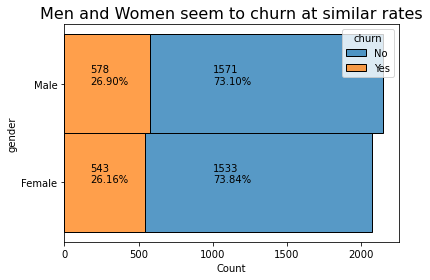

In [16]:
sns.histplot(data=train, y='gender', hue='churn', multiple='stack')
plt.title('Men and Women seem to churn at similar rates',fontdict={'fontsize':16})
plt.text(175,'Male',f'578\n{Percent(578/(578+1571))}')
plt.text(175,"Female", f'543\n{Percent(543/(543+1533))}')
plt.text(1000,'Male', f'1571\n{Percent(1571/(578+1571))}')
plt.text(1000,'Female', f'1533\n{Percent(1533/(543+1533))}')
plt.show()

In [17]:
train['gender'][df.churn == 'Yes'].value_counts()

Male      578
Female    543
Name: gender, dtype: int64

In [18]:
train['gender'][df.churn == 'No'].value_counts()

Male      1571
Female    1533
Name: gender, dtype: int64

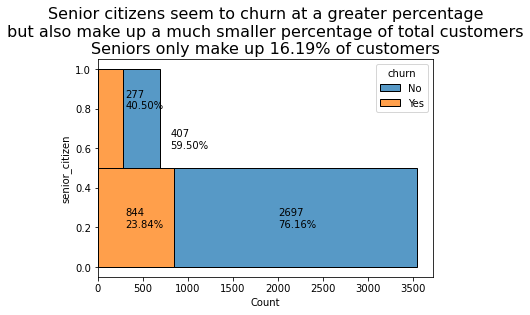

In [19]:
sns.histplot(data=train, y='senior_citizen', hue='churn', multiple='stack', bins=2)
plt.text(300,.8,f'277\n{Percent(277/(277+407))}')
plt.text(800,.6,f'407\n{Percent(407/(277+407))}')
plt.text(300,.2,f'844\n{Percent(844/(844+2697))}')
plt.text(2000,.2,f'2697\n{Percent(2697/(844+2697))}')
plt.title(f'Senior citizens seem to churn at a greater percentage\n\
but also make up a much smaller percentage of total customers\n\
Seniors only make up {Percent((277+407)/(277+407+844+2697))} of customers',
          fontdict={'fontsize':16}
         )
plt.show()

In [20]:
train['senior_citizen'][df.churn == 'Yes'].value_counts()

0    844
1    277
Name: senior_citizen, dtype: int64

In [21]:
train['senior_citizen'][df.churn == 'No'].value_counts()

0    2697
1     407
Name: senior_citizen, dtype: int64

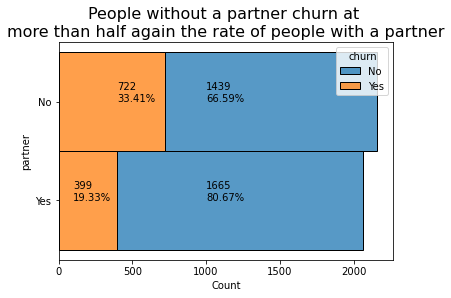

In [22]:
sns.histplot(data=train, y='partner', hue='churn', multiple='stack')
plt.title('People without a partner churn at \n\
more than half again the rate of people with a partner',
         fontdict={'fontsize':16})
plt.text(400, 'No', f'722\n{Percent(722/(722+1439))}')
plt.text(1000, 'No', f'1439\n{Percent(1439/(722+1439))}')
plt.text(100, 'Yes', f'399\n{Percent(399/(399+1665))}')
plt.text(1000, 'Yes', f'1665\n{Percent(1665/(399+1665))}')
plt.show()

In [23]:
train['partner'][df.churn == 'Yes'].value_counts()

No     722
Yes    399
Name: partner, dtype: int64

In [24]:
train['partner'][df.churn == 'No'].value_counts()

Yes    1665
No     1439
Name: partner, dtype: int64

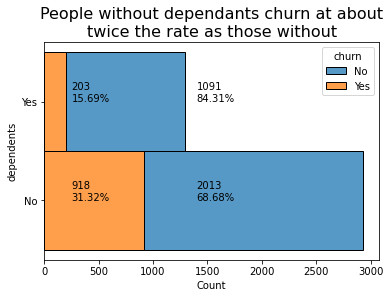

In [25]:
sns.histplot(data=train, y='dependents', hue='churn', multiple='stack',)# kde=True)

plt.title('People without dependants churn at about\n\
twice the rate as those without',fontdict={'fontsize':16})

plt.text(250, 'Yes', f'{203}\n{Percent(203/(203+1091))}')
plt.text(1400, 'Yes', f'{1091}\n{Percent(1091/(203+1091))}')
plt.text(250, 'No', f'{918}\n{Percent(918/(918+2013))}')
plt.text(1400, 'No', f'{2013}\n{Percent(2013/(918+2013))}')

plt.show()

In [26]:
train['dependents'][df.churn == 'Yes'].value_counts()

No     918
Yes    203
Name: dependents, dtype: int64

In [27]:
train['dependents'][df.churn == 'No'].value_counts()

No     2013
Yes    1091
Name: dependents, dtype: int64

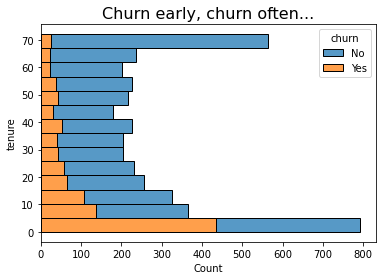

In [28]:
sns.histplot(data=train, y='tenure', hue='churn', multiple='stack')
plt.title('Churn early, churn often...',fontdict={'fontsize':16})
plt.show()

In [29]:
train['tenure'][df.churn == 'Yes'].value_counts()

1     228
2      80
3      51
4      46
7      35
     ... 
45      3
69      2
60      2
63      2
64      1
Name: tenure, Length: 72, dtype: int64

In [30]:
train['tenure'][df.churn == 'No'].value_counts()

72    214
1     130
71    101
70     67
2      63
     ... 
36     25
21     25
43     24
39     22
0       9
Name: tenure, Length: 73, dtype: int64

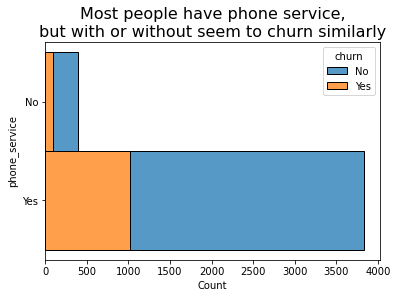

In [31]:
sns.histplot(data=train, y='phone_service', hue='churn', multiple='stack')
plt.title('Most people have phone service,\nbut with or without seem to churn similarly',
          fontdict={'fontsize':16}
         )
plt.show()

In [32]:
train['phone_service'][df.churn == 'Yes'].value_counts()

Yes    1023
No       98
Name: phone_service, dtype: int64

In [33]:
train['phone_service'][df.churn == 'No'].value_counts()

Yes    2809
No      295
Name: phone_service, dtype: int64

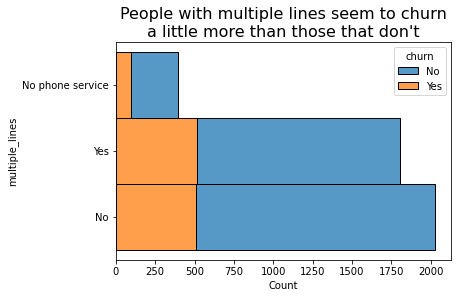

In [34]:
sns.histplot(data=train, y='multiple_lines', hue='churn', multiple='stack')
plt.title('People with multiple lines seem to churn\na little more than those that don\'t',
          fontdict={'fontsize':16}
         )
plt.show()

In [35]:
ml_chr_yes = train['multiple_lines'][df.churn == 'Yes'].value_counts()
ml_chr_yes

Yes                 515
No                  508
No phone service     98
Name: multiple_lines, dtype: int64

In [36]:
ml_chr_no = train['multiple_lines'][df.churn == 'No'].value_counts()
ml_chr_no

No                  1517
Yes                 1292
No phone service     295
Name: multiple_lines, dtype: int64

In [37]:
ml_chr_yes / (ml_chr_yes + ml_chr_no)

No                  0.250864
No phone service    0.249364
Yes                 0.285003
Name: multiple_lines, dtype: float64

In [16]:
isty = train['internet_service_type'][df.churn == 'Yes'].value_counts()
isty

Fiber optic    773
DSL            274
None            74
Name: internet_service_type, dtype: int64

In [17]:
istn = train['internet_service_type'][df.churn == 'No'].value_counts()
istn

DSL            1173
Fiber optic    1082
None            849
Name: internet_service_type, dtype: int64

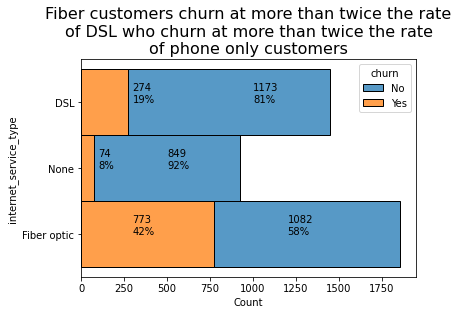

In [41]:
sns.histplot(data=train, y='internet_service_type', hue='churn', multiple='stack')
plt.title('Fiber customers churn at more than twice the rate\n\
of DSL who churn at more than twice the rate\nof phone only customers',fontdict={'fontsize':16})
plt.text(300, 'DSL',f'{isty[1]}\n{isty[1]/(isty[1]+istn[0]):.0%}')
plt.text(1000, 'DSL',f'{istn[0]}\n{istn[0]/(isty[1]+istn[0]):.0%}')
plt.text(100, 'None',f'{isty[2]}\n{isty[2]/(isty[2]+istn[2]):.0%}')
plt.text(500, 'None',f'{istn[2]}\n{istn[2]/(isty[2]+istn[2]):.0%}')
plt.text(300, 'Fiber optic',f'{isty[0]}\n{isty[0]/(isty[0]+istn[1]):.0%}')
plt.text(1200, 'Fiber optic',f'{istn[1]}\n{istn[1]/(isty[0]+istn[1]):.0%}')
plt.show()

In [39]:
isty.keys()[0]

'Fiber optic'

In [ ]:
for i in train:
    print(f"sns.histplot(data=train, y='{i}', hue='churn', multiple='stack')")
    print(f"train['{i}'][df.churn == 'Yes'].value_counts()")
    print(f"train['{i}'][df.churn == 'No'].value_counts()")

In [ ]:
def first_plots(plot_data, target, target_values=False, split_plots=False, df=False):
    """
    **This is a function to create Stacked Histograms for Data Exploration**
    
    The resulting plots are `Seaborn.histplot()`'s
    A library is returned with the name of your DataFrame
    concatenated with the columns in it. 
    Optionally this can be returned as a DataFrame
    
    Parameters:
    ----------------
    plot_data: is a DataFrame with your data
    target: your taget variable "y" (e.g. churn)
    target_values(=False): A library {1: 'Positive', 0: 'Negative'}
        - If no value entered, False means your Positive case is already == 1 in your data
    split_plots(=False): sns.histplot(...,col=split_plots)
        - if no value entered, False means you don't want to split the plots
    df(=Flase): If set to true the library is returned as a DataFrame instead
    
    Libraries:
    ----------------
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    """
    
    if target_values:
        train['targets'] = train.target.map({target_values[1]: 1, target_values[0]: 0})
    else: train['targets'] = train.target
        
    if split_plots:
        use_suplot = True
    else:
        use_suplot = False
        
#     if df: return a DataFrame should be at the end if it isn't that's why its broken ;)
    
    plot_data = plot_data.drop(columns=f'{target}')
    X = plot_data.columns.to_list.remove('targets')
    
    for i in plot_data[X]:
        target_positive = plot_data.i[plot_data.targets == 1].value_counts().sort_index()
        negative_data = plot_data.i[plot_data.targets == 0].value_counts().sort_index()
        
        vals_in_i = len(target_postive)
        
        for n in range(vals_in_i):
            
        
        

In [11]:
car = {1: "ford",
       2: 'chevy',
       3: 'honda'
      }

In [12]:
car[1]

'ford'

<AxesSubplot:xlabel='Count', ylabel='online_security'>

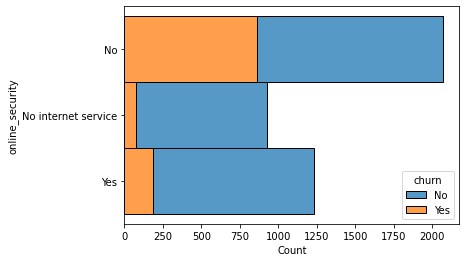

In [42]:
sns.histplot(data=train, y='online_security', hue='churn', multiple='stack')

In [43]:
train['online_security'][df.churn == 'Yes'].value_counts()

No                     858
Yes                    189
No internet service     74
Name: online_security, dtype: int64

In [44]:
train['online_security'][df.churn == 'No'].value_counts()

No                     1212
Yes                    1043
No internet service     849
Name: online_security, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='online_backup'>

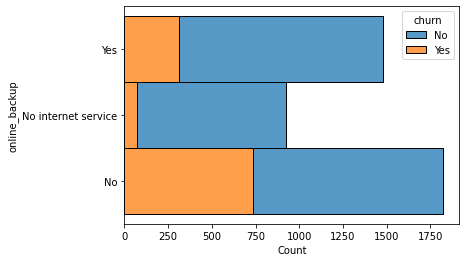

In [45]:
sns.histplot(data=train, y='online_backup', hue='churn', multiple='stack')

In [46]:
train['online_backup'][df.churn == 'Yes'].value_counts()

No                     735
Yes                    312
No internet service     74
Name: online_backup, dtype: int64

In [47]:
train['online_backup'][df.churn == 'No'].value_counts()

Yes                    1167
No                     1088
No internet service     849
Name: online_backup, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='device_protection'>

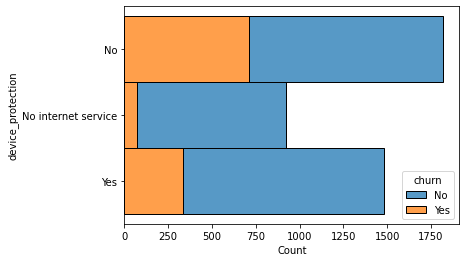

In [48]:
sns.histplot(data=train, y='device_protection', hue='churn', multiple='stack')

In [49]:
train['device_protection'][df.churn == 'Yes'].value_counts()

No                     710
Yes                    337
No internet service     74
Name: device_protection, dtype: int64

In [50]:
train['device_protection'][df.churn == 'No'].value_counts()

Yes                    1146
No                     1109
No internet service     849
Name: device_protection, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='tech_support'>

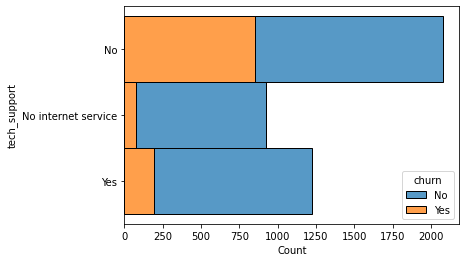

In [51]:
sns.histplot(data=train, y='tech_support', hue='churn', multiple='stack')

In [52]:
train['tech_support'][df.churn == 'Yes'].value_counts()

No                     852
Yes                    195
No internet service     74
Name: tech_support, dtype: int64

In [53]:
train['tech_support'][df.churn == 'No'].value_counts()

No                     1227
Yes                    1028
No internet service     849
Name: tech_support, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='streaming_tv'>

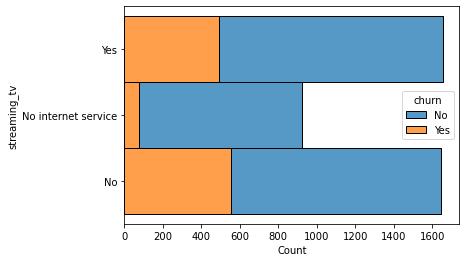

In [54]:
sns.histplot(data=train, y='streaming_tv', hue='churn', multiple='stack')

In [55]:
train['streaming_tv'][df.churn == 'Yes'].value_counts()

No                     556
Yes                    491
No internet service     74
Name: streaming_tv, dtype: int64

In [56]:
train['streaming_tv'][df.churn == 'No'].value_counts()

Yes                    1166
No                     1089
No internet service     849
Name: streaming_tv, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='streaming_movies'>

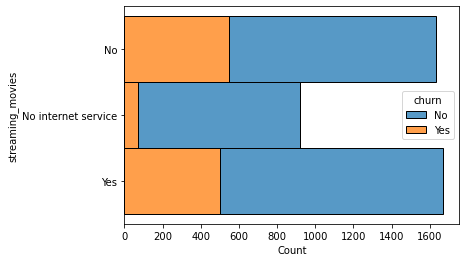

In [57]:
sns.histplot(data=train, y='streaming_movies', hue='churn', multiple='stack')

In [58]:
train['streaming_movies'][df.churn == 'Yes'].value_counts()

No                     546
Yes                    501
No internet service     74
Name: streaming_movies, dtype: int64

In [59]:
train['streaming_movies'][df.churn == 'No'].value_counts()

Yes                    1170
No                     1085
No internet service     849
Name: streaming_movies, dtype: int64

# People with streaming_tv or movies churn at similar rates<br><br>But people without online_security, backup, tech support, and device protection churn at higher rates

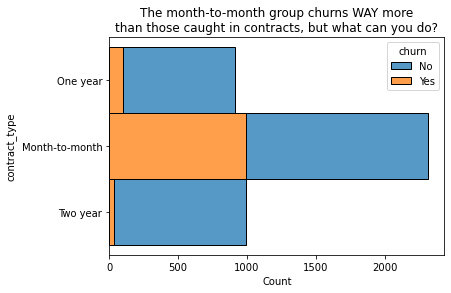

In [60]:
sns.histplot(data=train, y='contract_type', hue='churn', multiple='stack')
plt.title('The month-to-month group churns WAY more\nthan those caught in contracts, but what can you do?')
plt.show()

In [61]:
train['contract_type'][df.churn == 'Yes'].value_counts()

Month-to-month    990
One year           98
Two year           33
Name: contract_type, dtype: int64

In [62]:
train['contract_type'][df.churn == 'No'].value_counts()

Month-to-month    1327
Two year           962
One year           815
Name: contract_type, dtype: int64

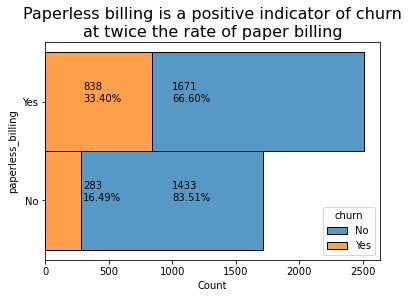

In [63]:
sns.histplot(data=train, y='paperless_billing', hue='churn', multiple='stack')
plt.title('Paperless billing is a positive indicator of churn\nat twice the rate of paper billing', 
          fontdict={'fontsize':16}
         )
plt.text(300, 'Yes', f'838\n{Percent(838/(838+1671))}')
plt.text(1000, 'Yes', f'{1671}\n{Percent(1671/(838+1671))}')
plt.text(300, 'No', f'{283}\n{Percent(283/(283+1433))}')
plt.text(1000, 'No', f'{1433}\n{Percent(1433/(283+1433))}')

plt.show()

In [64]:
train['paperless_billing'][df.churn == 'Yes'].value_counts()

Yes    838
No     283
Name: paperless_billing, dtype: int64

In [65]:
train['paperless_billing'][df.churn == 'No'].value_counts()

Yes    1671
No     1433
Name: paperless_billing, dtype: int64

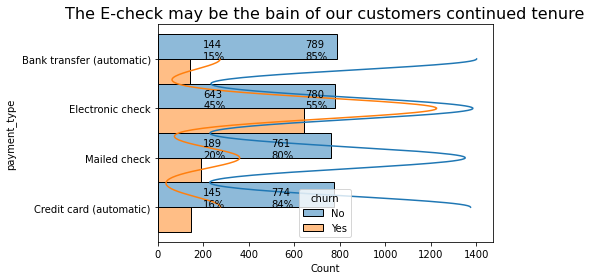

In [70]:
sns.histplot(data=train, y='payment_type', hue='churn', multiple='dodge', kde=True)
plt.title('The E-check may be the bain of our customers continued tenure',
          fontdict={'fontsize':16}
         )
# Bank transfer (automatic)
plt.text(200, 'Bank transfer (automatic)', f'{144}\n{(144/(144+789)):.0%}')
plt.text(650, 'Bank transfer (automatic)', f'{789}\n{(789/(144+789)):.0%}')

# Electronic Check
plt.text(200, 'Electronic check', f'{643}\n{(643/(643+780)):.0%}')
plt.text(650, 'Electronic check', f'{780}\n{(780/(643+780)):.0%}')

# Mailed Check
plt.text(200, 'Mailed check', f'{189}\n{(189/(189+761)):.0%}')
plt.text(500, 'Mailed check', f'{761}\n{(761/(189+761)):.0%}')

# Credit Card
plt.text(200, 'Credit card (automatic)', f'{145}\n{(145/(145+774)):.0%}')
plt.text(500, 'Credit card (automatic)', f'{774}\n{(774/(145+774)):.0%}')

plt.show()

In [59]:
train['payment_type'][df.churn == 'Yes'].value_counts(sort=False).sort_index()

Bank transfer (automatic)    144
Credit card (automatic)      145
Electronic check             643
Mailed check                 189
Name: payment_type, dtype: int64

In [61]:
train['payment_type'][df.churn == 'No'].value_counts(sort=False).sort_index()

Bank transfer (automatic)    789
Credit card (automatic)      774
Electronic check             780
Mailed check                 761
Name: payment_type, dtype: int64

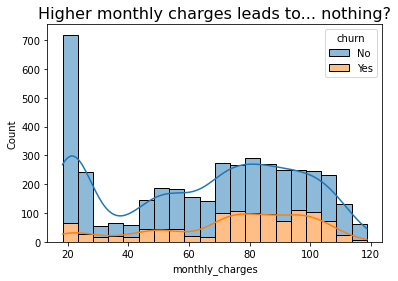

In [44]:
sns.histplot(data=train, x='monthly_charges', hue='churn', multiple='stack', bins=20, kde=True)
plt.title('Higher monthly charges leads to... nothing?', fontsize=16)
plt.show()

In [70]:
train['monthly_charges'][df.churn == 'Yes'].value_counts()

74.40     8
93.85     6
70.15     5
70.10     5
74.90     5
         ..
35.90     1
105.75    1
79.05     1
99.40     1
24.10     1
Name: monthly_charges, Length: 691, dtype: int64

In [71]:
train['monthly_charges'][df.churn == 'No'].value_counts()

20.05    33
19.85    30
19.90    28
19.65    28
20.00    27
         ..
30.05     1
51.80     1
92.45     1
78.65     1
80.95     1
Name: monthly_charges, Length: 1219, dtype: int64

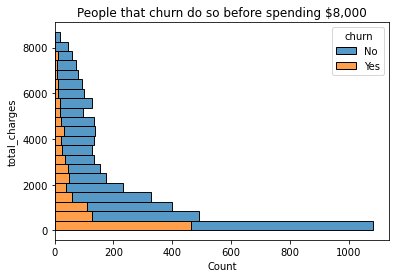

In [72]:
sns.histplot(data=train, y='total_charges', hue='churn', multiple='stack')
plt.title('People that churn do so before spending $8,000')
plt.show()

In [73]:
train['total_charges'][df.churn == 'Yes'].value_counts()

20.20     5
69.60     3
45.10     3
69.95     3
19.90     3
         ..
518.90    1
846.00    1
100.25    1
365.55    1
237.95    1
Name: total_charges, Length: 1070, dtype: int64

In [74]:
train['total_charges'][df.churn == 'No'].value_counts()

19.85      4
20.05      4
19.65      4
19.75      4
19.55      3
          ..
1021.55    1
663.55     1
5237.40    1
5194.05    1
685.55     1
Name: total_charges, Length: 3025, dtype: int64

# What are some of our takeaways thus far?

  - Things that aren't related to churn...
    - gender - they churn evenly
      - Can probably drop this field and not use it as a feature
    - phone servie
      - Everyone has phone service except a portion of the DSL customers
    - multiple lines
      - Multiple lines seems to line up with the DSL customers that do have phone
  - Things that don't matter much...
    - senior citizens - don't make up a great deal of customers
    - Streaming_tv
    - Streaming_movies
  - Things that seem to have a relationship to churn...
    - partner - no partner has more churn
    - dependents - no dependents has more churn
    - Fiber - DSL - No ISP 42%/19%/8% Churn
    - online backup      - not having leads to churn
    - online security    - not having leads to churn
    - device protection  - not having leads to churn
    - tech support       - not having leads to churn
    - Electronic check seems to be the LARGEST indicator of churn
      - 45% of customers using E-checks churn

In [75]:
drop_columns = ['gender', 'phone_service', 'multiple_lines', 'streaming_tv', 'streaming_movies']

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   gender                 4225 non-null   object 
 2   senior_citizen         4225 non-null   int64  
 3   partner                4225 non-null   object 
 4   dependents             4225 non-null   object 
 5   tenure                 4225 non-null   int64  
 6   phone_service          4225 non-null   object 
 7   multiple_lines         4225 non-null   object 
 8   internet_service_type  4225 non-null   object 
 9   online_security        4225 non-null   object 
 10  online_backup          4225 non-null   object 
 11  device_protection      4225 non-null   object 
 12  tech_support           4225 non-null   object 
 13  streaming_tv           4225 non-null   object 
 14  streaming_movies       4225 non-null   object 
 15  c

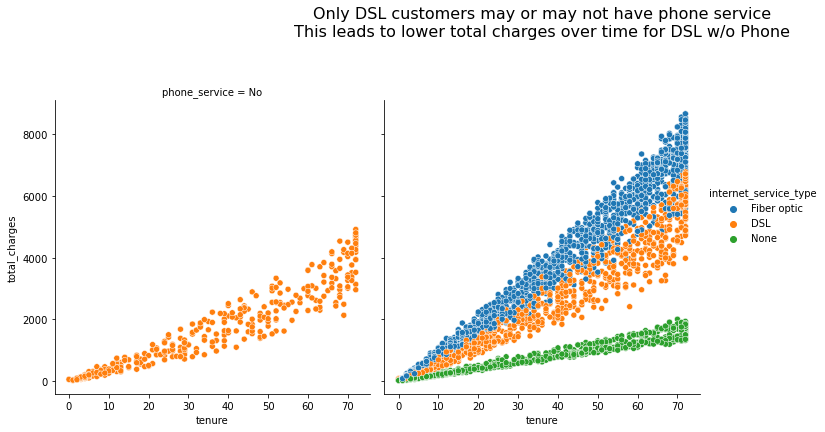

In [82]:
sns.relplot(data=train, 
            x='tenure', 
            y='total_charges', 
            hue='internet_service_type',
            hue_order=['Fiber optic', 'DSL', 'None'], 
            col='phone_service'
           )
plt.title('Only DSL customers may or may not have phone service\n\
This leads to lower total charges over time for DSL w/o Phone',
             y=1.2,
             fontdict= {'fontsize':16}
            )
plt.show()

In [83]:
DSLy = len(train.internet_service_type[(train.internet_service_type == 'DSL')\
                            & (train.phone_service == 'Yes')])

In [84]:
DSLn = len(train.internet_service_type[(train.internet_service_type == 'DSL')\
                            & (train.phone_service == 'No')])

In [85]:
print(f'''
People with DSL+Phone make up: {Percent(DSLy/(DSLy+DSLn))}

While those with DSL and no Phone: {Percent(DSLn/(DSLy+DSLn))}
''')


People with DSL+Phone make up: 72.84%

While those with DSL and no Phone: 27.16%



In [86]:
train.internet_service_type[(train.internet_service_type == 'Fiber optic')\
                            & (train.phone_service == 'No')]


Series([], Name: internet_service_type, dtype: object)

## Questions I have
  - Are people with Fiber optic forced to have phone service also?
    - The DSL group has over a quater (27.16%) of users with no phone,<br> and Fiber optic customers have phone service 100% of the time

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   gender                 4225 non-null   object 
 2   senior_citizen         4225 non-null   int64  
 3   partner                4225 non-null   object 
 4   dependents             4225 non-null   object 
 5   tenure                 4225 non-null   int64  
 6   phone_service          4225 non-null   object 
 7   multiple_lines         4225 non-null   object 
 8   internet_service_type  4225 non-null   object 
 9   online_security        4225 non-null   object 
 10  online_backup          4225 non-null   object 
 11  device_protection      4225 non-null   object 
 12  tech_support           4225 non-null   object 
 13  streaming_tv           4225 non-null   object 
 14  streaming_movies       4225 non-null   object 
 15  c

In [ ]:
counts = pd.DataFrame(data = )

In [77]:
import plotly.express as px
fig = px.bar(data_frame=train, 
             x='monthly_charges',
             y='total_charges'
            )
fig.show()

In [92]:
px.density_contour(data_frame=train,
                   x='total_charges',
                   y='internet_service_type',
                   z='churn1',
                   orientation='v'
                  )

### Let's see what's a little deeper here...
  - Maybe we should separate the classes of customers to see if they all have the same drivers
  - Might also just drop everyone that hasn't had a chance to churn yet (they don't tell us anything)

In [87]:
# Find the names of the contract types so we can start fidling
train.contract_type.value_counts(dropna=False)

Month-to-month    2317
Two year           995
One year           913
Name: contract_type, dtype: int64

In [88]:
# If contract type is Two year, and the tenure is under 25 months they couldn't have churned
train[(train.contract_type == 'Two year')&(train.tenure < 25)].churn.value_counts()

No    85
Name: churn, dtype: int64

In [89]:
# This is interesting... Customer with a 1-year contract churning on month 2
train[(train.contract_type == 'One year')&(train.tenure < 3)].churn.value_counts()

No     6
Yes    1
Name: churn, dtype: int64

In [90]:
# Phone only customer, mailed check
train[(train.contract_type == 'One year')&(train.tenure < 3)&(train.churn == 'Yes')]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn,null_charges
3113,4464-JCOLN,Male,0,Yes,Yes,2,Yes,No,None,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.85,35.9,Yes,False


In [91]:
train[(train.contract_type == 'One year')&(train.tenure < 10)].churn.value_counts()

No     43
Yes     2
Name: churn, dtype: int64

In [92]:
# Next is a DSL customer with no add on services and automatic Bank Transfer at 9 months
train[(train.contract_type == 'One year')&(train.tenure < 10)&(train.churn == 'Yes')]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn,null_charges
3113,4464-JCOLN,Male,0,Yes,Yes,2,Yes,No,None,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.85,35.9,Yes,False
4364,6158-DWPZT,Male,0,Yes,No,9,No,No phone service,DSL,No,...,No,No,No,One year,No,Bank transfer (automatic),24.10,259.8,Yes,False


In [93]:
train[(train.contract_type == 'One year')&(train.tenure < 13)].churn.value_counts()

No     76
Yes     7
Name: churn, dtype: int64

In [94]:
# get the index of the one year contract drops
one_year_drops = train[(train.contract_type == 'One year')&(train.tenure < 13)].index
# get the index of the two year contract drops
two_year_drops = train[(train.contract_type == 'Two year')&(train.tenure < 25)].index
# cast both.tolist() and addd them together to have an index to drop from train
contract_drops = one_year_drops.tolist()+two_year_drops.tolist()

In [95]:
# Next is a DSL customer with no add on services and automatic Bank Transfer at 9 months
train[(train.contract_type == 'One year')&(train.tenure < 13)&(train.churn == 'Yes')]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn,null_charges
1155,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,False
3113,4464-JCOLN,Male,0,Yes,Yes,2,Yes,No,None,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.85,35.90,Yes,False
6376,9033-EOXWV,Female,0,No,No,12,Yes,Yes,DSL,No,...,Yes,Yes,Yes,One year,No,Mailed check,74.05,872.65,Yes,False
2712,3863-IUBJR,Male,0,Yes,Yes,12,Yes,No,DSL,No,...,No,No,Yes,One year,No,Credit card (automatic),53.65,696.35,Yes,False
4006,5649-VUKMC,Female,0,No,No,12,Yes,No,Fiber optic,No,...,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,Yes,False
3460,4905-JEFDW,Male,0,No,No,11,No,No phone service,DSL,No,...,No,Yes,No,One year,Yes,Electronic check,41.60,470.60,Yes,False
4364,6158-DWPZT,Male,0,Yes,No,9,No,No phone service,DSL,No,...,No,No,No,One year,No,Bank transfer (automatic),24.10,259.80,Yes,False


<AxesSubplot:xlabel='tenure', ylabel='churn1'>

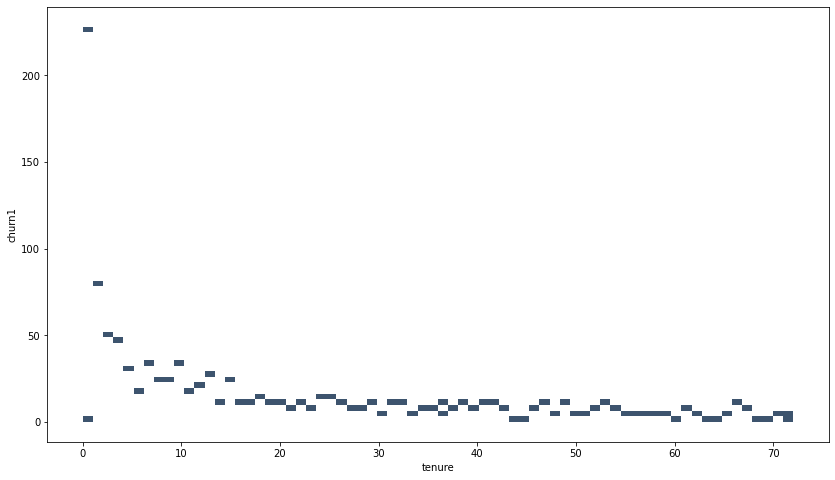

In [94]:
plt.figure(figsize=(14,8))
sns.histplot(data=tenure_churn, x='tenure', y='churn1', bins=70)

In [97]:
px?

In [90]:
train['churn1'] = train['churn'].map({'No': 0, 'Yes':1})

In [91]:
train['churn1']

5911    0
2479    0
5889    1
6087    0
785     0
       ..
6102    1
356     0
1756    1
2127    0
3586    0
Name: churn1, Length: 4225, dtype: int64

In [93]:
tenure_churn = train[['tenure', 'churn1']].groupby('tenure').sum()

In [266]:
 train.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   gender                 4225 non-null   object 
 2   senior_citizen         4225 non-null   int64  
 3   partner                4225 non-null   object 
 4   dependents             4225 non-null   object 
 5   tenure                 4225 non-null   int64  
 6   phone_service          4225 non-null   object 
 7   multiple_lines         4225 non-null   object 
 8   internet_service_type  4225 non-null   object 
 9   online_security        4225 non-null   object 
 10  online_backup          4225 non-null   object 
 11  device_protection      4225 non-null   object 
 12  tech_support           4225 non-null   object 
 13  streaming_tv           4225 non-null   object 
 14  streaming_movies       4225 non-null   object 
 15  c

In [267]:
train.drop(index=contract_drops, inplace=True)

In [280]:
drop_columns

['gender',
 'phone_service',
 'multiple_lines',
 'streaming_tv',
 'streaming_movies',
 'churn',
 'null_charges',
 'cutomer_id']

In [278]:
drop_columns += ['churn', 'null_charges', 'cutomer_id']
# love when I make a typo that breaks my code and I hvae to rewrite/run code, copy and paste...

In [281]:
# copy paste and fix the typo
drop_columns = ['gender',
 'phone_service',
 'multiple_lines',
 'streaming_tv',
 'streaming_movies',
 'churn',
 'null_charges',
 'customer_id']

In [289]:
train.drop(columns=drop_columns, inplace=True)

In [283]:
train[['partner', 
       'dependents', 
       'online_security', 
       'online_backup', 
       'device_protection', 
       'tech_support', 
       'paperless_billing']].map({'Yes': 1, 'No': 0, 'No internet service': 0})

AttributeError: 'LuxDataFrame' object has no attribute 'map'

In [285]:
train.partner = train.partner.map({'Yes': 1, 'No': 0, 'No internet service': 0})

In [286]:
train.partner

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [287]:
# train.dependents = train.dependents.map({'Yes': 1, 'No': 0, 'No internet service': 0})
# train.online_backup = train.online_backup.map({'Yes': 1, 'No': 0, 'No internet service': 0})
# train.online_security = train.online_security.map({'Yes': 1, 'No': 0, 'No internet service': 0}
for i in train[['dependents', 
       'online_security', 
       'online_backup', 
       'device_protection', 
       'tech_support', 
       'paperless_billing']]:
    train[i] = train[i].map({'Yes': 1, 'No': 0, 'No internet service': 0})

In [290]:
train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [291]:
dummy_list = ['internet_service_type', 'contract_type', 'payment_type']

In [293]:
dummies = pd.get_dummies(train[dummy_list])

In [296]:
train = pd.concat([train, dummies], axis=1)

In [298]:
train['add_ons'] = train.online_backup + train.online_security + train.device_protection + train.tech_support

In [300]:
train.add_ons

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [301]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 4057 entries, 5911 to 2127
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          4057 non-null   int64  
 1   partner                                 4057 non-null   int64  
 2   dependents                              4057 non-null   int64  
 3   tenure                                  4057 non-null   int64  
 4   internet_service_type                   4057 non-null   object 
 5   online_security                         4057 non-null   int64  
 6   online_backup                           4057 non-null   int64  
 7   device_protection                       4057 non-null   int64  
 8   tech_support                            4057 non-null   int64  
 9   contract_type                           4057 non-null   object 
 10  paperless_billing                       4057 non-null   i

In [302]:
drop_dummies = ['internet_service_type', 
               'online_security', 
               'online_backup', 
               'device_protection', 
               'tech_support',
               'contract_type',
               'payment_type',
               'internet_service_type_None',
               'contract_type_Month-to-month',
               'payment_type_Mailed check'
              ]

In [304]:
train.drop(columns=drop_dummies, inplace=True)
train.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 4057 entries, 5911 to 2127
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          4057 non-null   int64  
 1   partner                                 4057 non-null   int64  
 2   dependents                              4057 non-null   int64  
 3   tenure                                  4057 non-null   int64  
 4   paperless_billing                       4057 non-null   int64  
 5   monthly_charges                         4057 non-null   float64
 6   total_charges                           4057 non-null   float64
 7   churn1                                  4057 non-null   int64  
 8   internet_service_type_DSL               4057 non-null   uint8  
 9   internet_service_type_Fiber optic       4057 non-null   uint8  
 10  contract_type_One year                  4057 non-null   u

In [306]:
train.columns = ['senior', 'partner', 'dependents', 'tenure',
       'e_bill', 'monthly_charges', 'total_charges', 'churn1',
       'DSL', 'Fiber',
       'one_year', 'two_year',
       'bank_transfer',
       'cc', 'e_check',
       'add_ons']

In [307]:
train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [310]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 4057 entries, 5911 to 2127
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior           4057 non-null   int64  
 1   partner          4057 non-null   int64  
 2   dependents       4057 non-null   int64  
 3   tenure           4057 non-null   int64  
 4   e_bill           4057 non-null   int64  
 5   monthly_charges  4057 non-null   float64
 6   total_charges    4057 non-null   float64
 7   churn1           4057 non-null   int64  
 8   DSL              4057 non-null   uint8  
 9   Fiber            4057 non-null   uint8  
 10  one_year         4057 non-null   uint8  
 11  two_year         4057 non-null   uint8  
 12  bank_transfer    4057 non-null   uint8  
 13  cc               4057 non-null   uint8  
 14  e_check          4057 non-null   uint8  
 15  add_ons          4057 non-null   int64  
dtypes: float64(2), int64(7), uint8(7)
memory usage: 344.7 KB


In [320]:
# Map the 1's in Fiber to 2's and...
train['Internet'] = train.Fiber.map({1:2, 0:0})
# train.Internet  # Check

# Add the new column with DSL...
train['Internet'] = train.Internet + train.DSL
# train.Internet  # Check

# Now we have 0, 1, and 2
# We can map these to the titles for our hues
train['Internet'] = train.Internet.map({0:'None', 
                              1:'DSL',
                              2:'Fiber'
                             }
                            )
train.Internet

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

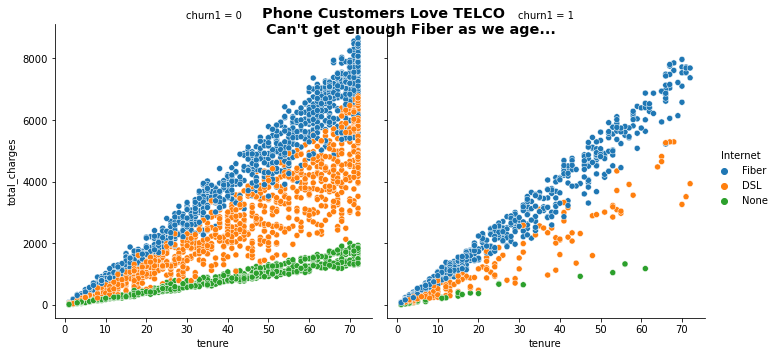

In [333]:
sns.relplot(data=train, 
            x='tenure', 
            y='total_charges', 
            hue='Internet',
            hue_order=['Fiber', 'DSL', 'None'], 
            col='churn1'
           ).fig.suptitle('Phone Customers Love TELCO\n\
           Can\'t get enough Fiber as we age...' ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )

# sns.set_theme()
# plt.title()
plt.show()

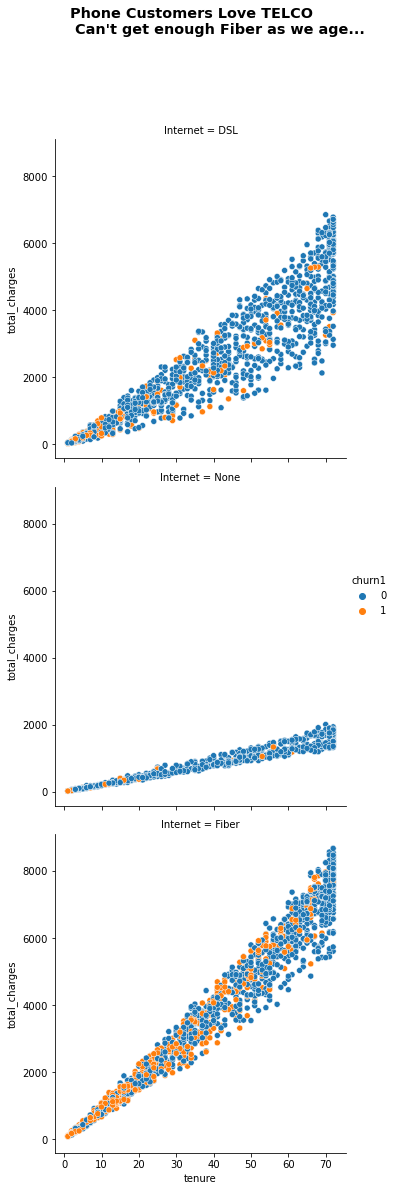

In [336]:
sns.relplot(data=train, 
            x='tenure', 
            y='total_charges', 
            hue='churn1',
#             hue_order=['Fiber', 'DSL', 'None'], 
            col='Internet',
            col_wrap=1
           )

plt.suptitle('Phone Customers Love TELCO\n\
           Can\'t get enough Fiber as we age...' ,
               fontsize = 'x-large' , 
               fontweight = 'bold', y=1.1 )

# sns.set_theme()
# plt.title()
plt.show()

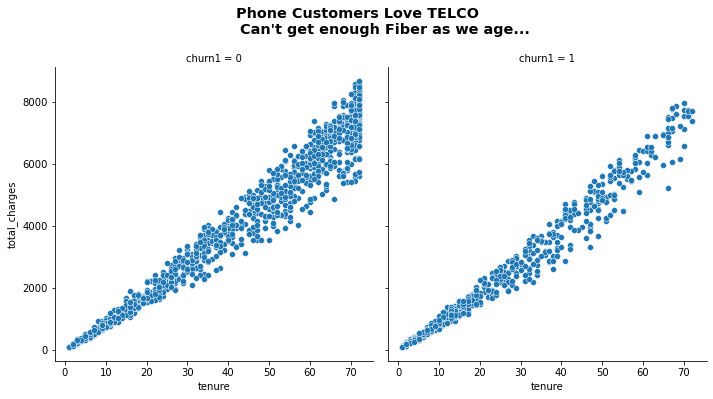

In [338]:
sns.relplot(data=train[train.Internet == 'Fiber'], 
            x='tenure', 
            y='total_charges', 
            col='churn1',
#             hue_order=['Fiber', 'DSL', 'None'], 
#             col='Internet',
#             col_wrap=1
           )

plt.suptitle('Phone Customers Love TELCO\n\
           Can\'t get enough Fiber as we age...' ,
               fontsize = 'x-large' , 
               fontweight = 'bold', y=1.1 )

# sns.set_theme()
# plt.title()
plt.show()

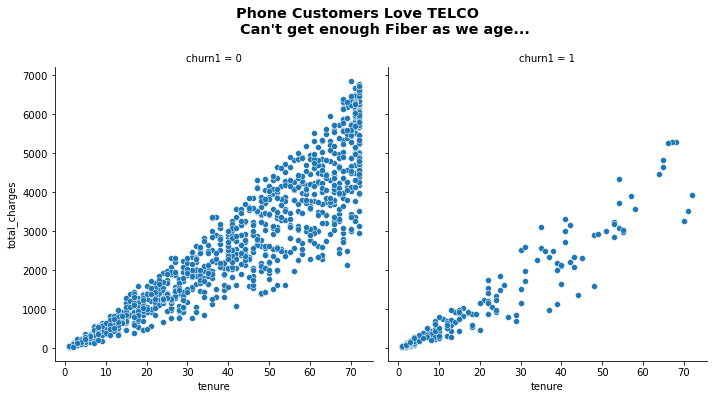

In [339]:
sns.relplot(data=train[train.Internet == 'DSL'], 
            x='tenure', 
            y='total_charges', 
            col='churn1',
#             hue_order=['Fiber', 'DSL', 'None'], 
#             col='Internet',
#             col_wrap=1
           )

plt.suptitle('Phone Customers Love TELCO\n\
           Can\'t get enough Fiber as we age...' ,
               fontsize = 'x-large' , 
               fontweight = 'bold', y=1.1 )

# sns.set_theme()
# plt.title()
plt.show()

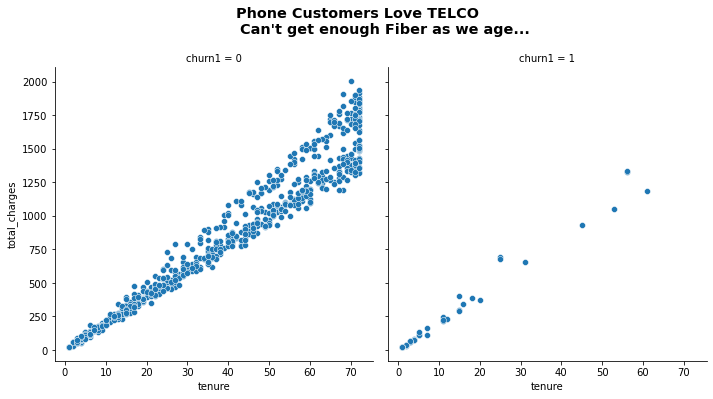

In [340]:
sns.relplot(data=train[train.Internet == 'None'], 
            x='tenure', 
            y='total_charges', 
            col='churn1',
#             hue_order=['Fiber', 'DSL', 'None'], 
#             col='Internet',
#             col_wrap=1
           )

plt.suptitle('Phone Customers Love TELCO\n\
           Can\'t get enough Fiber as we age...' ,
               fontsize = 'x-large' , 
               fontweight = 'bold', y=1.1 )

# sns.set_theme()
# plt.title()
plt.show()

# Last Cell
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>